Run this command in your terminal to install the packages if you do not have them 

pip install pandas numpy seaborn matplotlib scipy mne

Imports

In [2]:
import os
import numpy as np
import mne
import glob
import matplotlib.pyplot as plt

Base directory containing all experiment folders is common throughout the notebook

In [ ]:
base_dir = '/path/to/downloads/directory' # Path to the folder that has all downloaded experiments unzipped 
base_dir = r'C:\Users\Nikhil\research\mevd\MEVD_Final_v2'

Figure: EEG Snippet

In [ ]:
def eeg_snippet(bids_dir, stim_no, start_time, end_time):
    eeg_results = {
        'ses-01': {},  # Attend
        'ses-02': {}   # Distract
    }
    fs = 128
    for session in eeg_results.keys():
        session_path = os.path.join(bids_dir, f'sub-*', session, 'eeg' , f'*{stim_no}*.bdf')
        bdf_files = glob.glob(session_path)
        for subj_idx, bdf_file in enumerate(bdf_files):
            sub = f'sub_{subj_idx + 1}'
            eeg_results[session][sub] = {}
            raw = mne.io.read_raw_bdf(bdf_file, preload=True)
            cropped_data = raw._data[:, start_time*fs:end_time*fs]
            eeg_results[session][sub] = cropped_data
    return eeg_results

def mean_eeg(exp, ses, cropped_dict):
    subject_data = list(cropped_dict[exp][ses].values())
    stacked_data = np.stack(subject_data, axis=0)
    mean_data = np.mean(stacked_data, axis=0)
    return mean_data

Experiment:  ex2
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\derivatives\sub-01\ses-01\eeg\sub-01_ses-01_task-stim01_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23679  =      0.000 ...   184.992 secs...
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\derivatives\sub-02\ses-01\eeg\sub-02_ses-01_task-stim01_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23679  =      0.000 ...   184.992 secs...
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\derivatives\sub-03\ses-01\eeg\sub-03_ses-01_task-stim01_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23679  =      0.000 ...   184.992 secs...
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\de

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_10332\2192894375.py:13: RuntimeWarning: Physical range is not defined in following channels:
Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, T7, TP7, CP5, CP3, CP1, P1, P3, P5, P7, P9, PO7, PO3, O1, Iz, Oz, POz, Pz, CPz, Fpz, Fp2, AF8, AF4, Afz, Fz, F2, F4, F6, F8, FT8, FC6, FC4, FC2, FCz, Cz, C2, C4, C6, T8, TP8, CP6, CP4, CP2, P2, P4, P6, P8, P10, PO8, PO4, O2
  raw = mne.io.read_raw_bdf(bdf_file, preload=True)


Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment4\derivatives\sub-37\ses-02\eeg\sub-37_ses-02_task-stim01_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23679  =      0.000 ...   184.992 secs...
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment4\derivatives\sub-38\ses-02\eeg\sub-38_ses-02_task-stim01_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23679  =      0.000 ...   184.992 secs...
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment4\derivatives\sub-39\ses-02\eeg\sub-39_ses-02_task-stim01_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23679  =      0.000 ...   184.992 secs...
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment4\derivatives\sub-40\

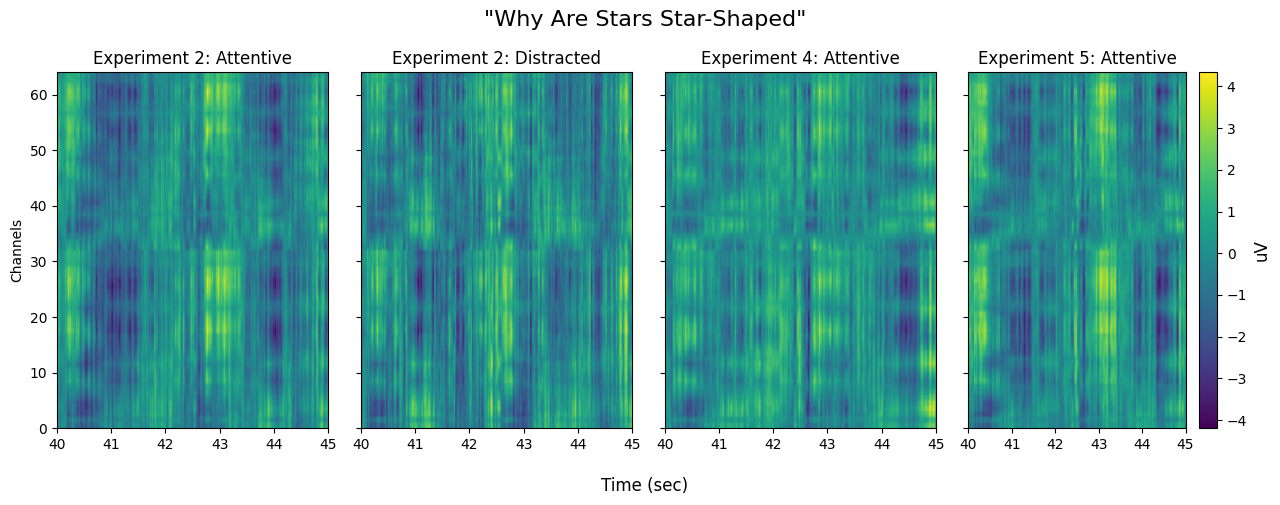

In [5]:
# Paths to experiments containing stars stimulus
stars_exp_paths = [
    r'experiment2\derivatives',
    r'experiment4\derivatives',
    r'experiment5\derivatives',
]

bids_directories_stars = [os.path.join(base_dir, os.path.normpath(path)) for path in stars_exp_paths] # Constructing full paths

exp_dict = {
    'ex2': {},
    'ex4': {},
    'ex5': {},
}

stim_no = 'stim01' #why are stars star shaped is stim01 in all
cropped_dict = {}

for exp_index, bids_directory in enumerate(bids_directories_stars):
    if exp_index == 0:
        exp_label = f'ex{exp_index + 2}'
    else:
        exp_label = f'ex{exp_index + 3}'
    cropped_dict[exp_label] = {}
    print('Experiment: ', exp_label)
    eeg_cropped = eeg_snippet(bids_directory, stim_no, 40, 45)
    cropped_dict[exp_label] = eeg_cropped

exp2_ses1 = mean_eeg('ex2', 'ses-01', cropped_dict)
exp2_ses2 = mean_eeg('ex2', 'ses-02', cropped_dict)

mean_exp4 = mean_eeg('ex4', 'ses-02', cropped_dict)

exp5_ses1 = mean_eeg('ex5', 'ses-01', cropped_dict)
exp5_ses2 = mean_eeg('ex5', 'ses-02', cropped_dict)

mean_exp5 = np.mean([exp5_ses1, exp5_ses2], axis=0)

time_start = 40
time_end = 45
fig, axes = plt.subplots(1, 4, figsize=(13, 5), sharey=True)  

fig.suptitle('"Why Are Stars Star-Shaped"', fontsize=16)

im1 = axes[0].imshow(exp2_ses1 * 1e6 , aspect='auto', cmap='viridis', extent=[time_start, time_end, 0, exp2_ses1.shape[0]])
axes[0].set_title("Experiment 2: Attentive")

im2 = axes[1].imshow(exp2_ses2 * 1e6, aspect='auto', cmap='viridis', extent=[time_start, time_end, 0, exp2_ses2.shape[0]])
axes[1].set_title("Experiment 2: Distracted")

im3 = axes[2].imshow(mean_exp4 * 1e6, aspect='auto', cmap='viridis', extent=[time_start, time_end, 0, mean_exp4.shape[0]])
axes[2].set_title("Experiment 4: Attentive")

im4 = axes[3].imshow(mean_exp5 * 1e6, aspect='auto', cmap='viridis', extent=[time_start, time_end, 0, mean_exp5.shape[0]])
axes[3].set_title("Experiment 5: Attentive")
axes[0].set_ylabel("Channels")
fig.supxlabel("Time (sec)")

cbar = fig.colorbar(im4)
cbar.update_ticks()
cbar.set_label('uV', fontsize=12)

plt.tight_layout()
plt.show()

Experiment:  ex3
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\derivatives\sub-01\ses-01\eeg\sub-01_ses-01_task-stim02_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18303  =      0.000 ...   142.992 secs...
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\derivatives\sub-02\ses-01\eeg\sub-02_ses-01_task-stim02_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18303  =      0.000 ...   142.992 secs...
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\derivatives\sub-03\ses-01\eeg\sub-03_ses-01_task-stim02_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18303  =      0.000 ...   142.992 secs...
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\de

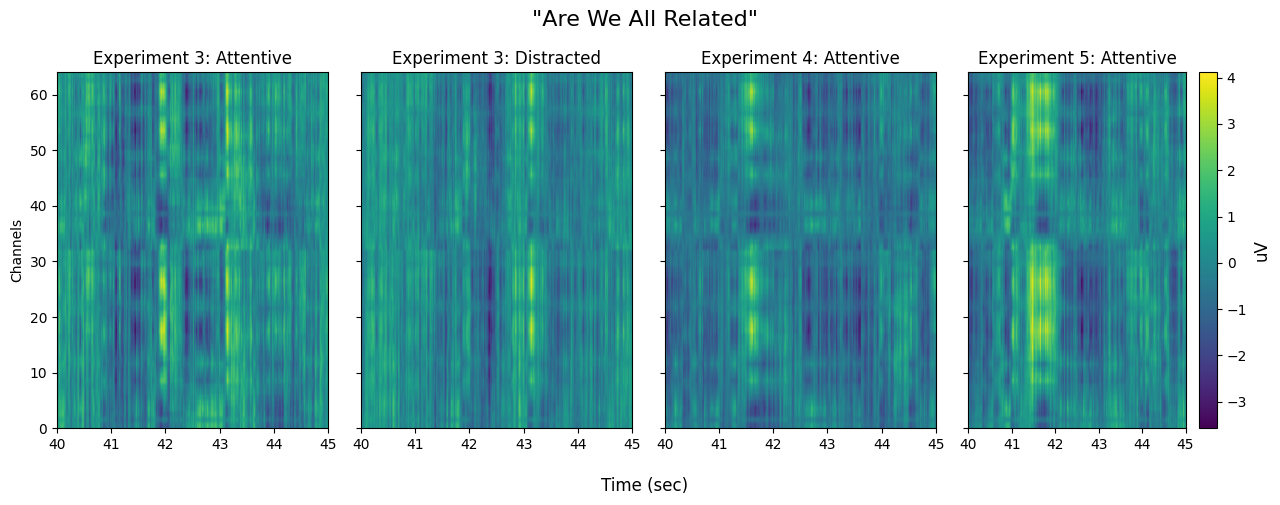

In [6]:
# Paths to experiments containing related stimulus
related_exp_paths = [
    r'experiment3\derivatives',
    r'experiment4\derivatives',
    r'experiment5\derivatives',
]

bids_directories_related = [os.path.join(base_dir, os.path.normpath(path)) for path in stars_exp_paths] # Constructing full paths

exp_dict = {
    'ex3': {},
    'ex4': {},
    'ex5': {},
}

cropped_dict = {}

for exp_index, bids_directory in enumerate(bids_directories_related):
    stim_no = 'stim03' #are we related
    if exp_index == 0:
        exp_label = f'ex{exp_index + 2}'
    else:
        exp_label = f'ex{exp_index + 3}'
    if exp_index == 0:
        exp_label = f'ex{exp_index + 3}'
        stim_no = 'stim02'    
    cropped_dict[exp_label] = {}
    print('Experiment: ', exp_label)
    eeg_cropped = eeg_snippet(bids_directory, stim_no, 40, 45)
    cropped_dict[exp_label] = eeg_cropped

exp3_ses1 = mean_eeg('ex3', 'ses-01', cropped_dict)
exp3_ses2 = mean_eeg('ex3', 'ses-02', cropped_dict)

mean_exp4 = mean_eeg('ex4', 'ses-02', cropped_dict)

exp5_ses1 = mean_eeg('ex5', 'ses-01', cropped_dict)
exp5_ses2 = mean_eeg('ex5', 'ses-02', cropped_dict)

mean_exp5 = np.mean([exp5_ses1, exp5_ses2], axis=0)

time_start = 40
time_end = 45
fig, axes = plt.subplots(1, 4, figsize=(13, 5), sharey=True)  
fig.suptitle('"Are We All Related"', fontsize=16)

im1 = axes[0].imshow(exp3_ses1 * 1e6 , aspect='auto', cmap='viridis', extent=[time_start, time_end, 0, exp3_ses1.shape[0]])
axes[0].set_title("Experiment 3: Attentive")

im2 = axes[1].imshow(exp3_ses2 * 1e6, aspect='auto', cmap='viridis', extent=[time_start, time_end, 0, exp3_ses2.shape[0]])
axes[1].set_title("Experiment 3: Distracted")

im3 = axes[2].imshow(mean_exp4 * 1e6, aspect='auto', cmap='viridis', extent=[time_start, time_end, 0, mean_exp4.shape[0]])
axes[2].set_title("Experiment 4: Attentive")

im4 = axes[3].imshow(mean_exp5 * 1e6, aspect='auto', cmap='viridis', extent=[time_start, time_end, 0, mean_exp5.shape[0]])
axes[3].set_title("Experiment 5: Attentive")
axes[0].set_ylabel("Channels")
fig.supxlabel("Time (sec)")

cbar = fig.colorbar(im4)
cbar.update_ticks()
cbar.set_label('uV', fontsize=12)

plt.tight_layout()
plt.show()

Figure: EEG Power Spectra

Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\derivatives\sub-01\ses-01\eeg\sub-01_ses-01_task-stim01_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23679  =      0.000 ...   184.992 secs...
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment2\derivatives\sub-01\ses-01\eeg\sub-01_ses-01_task-stim02_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 18303  =      0.000 ...   142.992 secs...
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEV

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_10332\4151715530.py:20: RuntimeWarning: Physical range is not defined in following channels:
Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, T7, TP7, CP5, CP3, CP1, P1, P3, P5, P7, P9, PO7, PO3, O1, Iz, Oz, POz, Pz, CPz, Fpz, Fp2, AF8, AF4, Afz, Fz, F2, F4, F6, F8, FT8, FC6, FC4, FC2, FCz, Cz, C2, C4, C6, T8, TP8, CP6, CP4, CP2, P2, P4, P6, P8, P10, PO8, PO4, O2
  raw = mne.io.read_raw_bdf(bdf_file, preload=True)
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_10332\4151715530.py:25: UserWarning: Zero value in spectrum for channels Fp1, F1, F3, F5, F7, FT7, FC5, FC3, FC1, Fpz, Fp2, Fz, F2, F4, F6, F8, FT8, FC6, FC4, FC2, FCz
  psd = raw.compute_psd(method='welch', fmin=0.1, fmax=64, n_fft=512, picks=picks, average='mean')
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_10332\4151715530.py:25: UserWarning: Zero value in spectrum for channels C1, C3, C5, CP5, CP3, CP1, CPz, Cz, C2, C4, C6, CP6, CP4, CP2
  psd = raw.compute_psd(method=

Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment4\derivatives\sub-30\ses-02\eeg\sub-30_ses-02_task-stim01_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23679  =      0.000 ...   184.992 secs...
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
Extracting EDF parameters from C:\Users\Nikhil\research\mevd\MEVD_Final_v2\experiment4\derivatives\sub-30\ses-02\eeg\sub-30_ses-02_task-stim02_desc-eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 49791  =      0.000 ...   388.992 secs...
Effective window size : 4.000 (s)
Effective window size : 4.000 

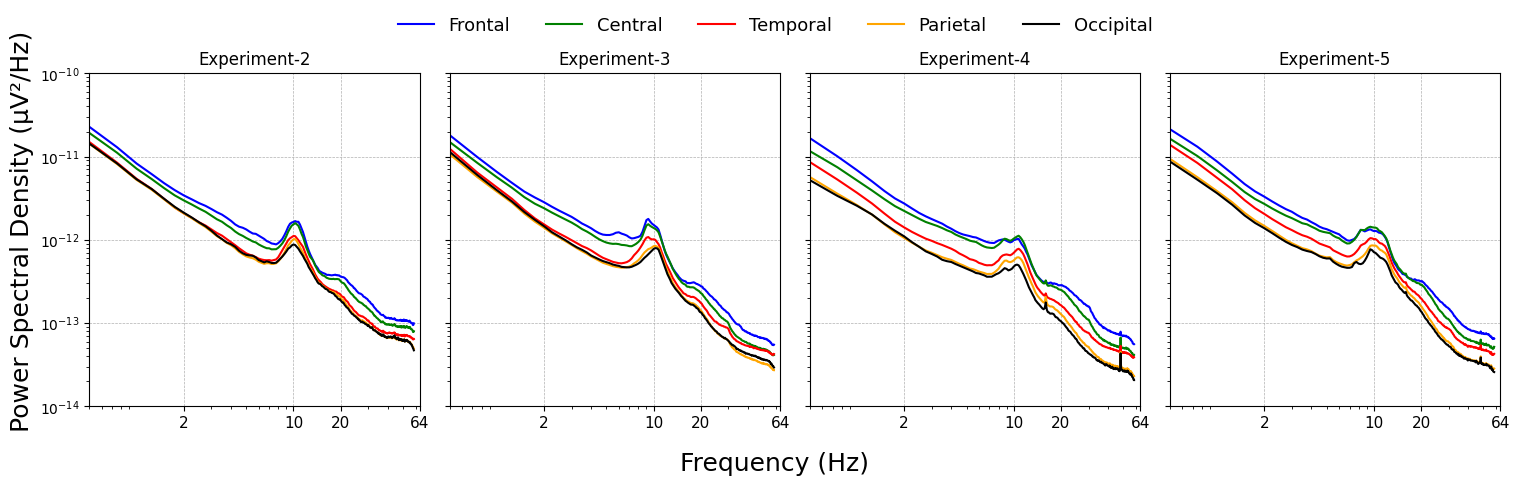

In [7]:
import os
import numpy as np
import mne
import glob
import matplotlib.pyplot as plt

def compute_psd_by_region(bids_dir, regions):
    psd_results = {
        'ses-01': {region: [] for region in regions.keys()},  # Attend
        'ses-02': {region: [] for region in regions.keys()}   # Distract
    }
    freqs = None  

    for session in psd_results.keys():
        # Construct the path to find BDF files
        session_path = os.path.join(bids_dir, f'sub-*', session, 'eeg', '*eeg.bdf')
        bdf_files = glob.glob(session_path)

        for bdf_file in bdf_files:
            raw = mne.io.read_raw_bdf(bdf_file, preload=True)
            for region, channels in regions.items():
                picks = mne.pick_channels(raw.info['ch_names'], include=channels)
                if len(picks) == 0:  
                    continue
                psd = raw.compute_psd(method='welch', fmin=0.1, fmax=64, n_fft=512, picks=picks, average='mean')
                psd_data, freqs = psd.get_data(return_freqs=True)
                psd_results[session][region].append(psd_data)
        
    averaged_psd = {}
    for session, regions_psd in psd_results.items():
        averaged_psd[session] = {}
        for region, psds in regions_psd.items():
            if psds:
                max_length = max(psd.shape[1] for psd in psds)
                padded_psds = []
                for psd in psds:
                    if psd.shape[1] < max_length:
                        pad_width = max_length - psd.shape[1]
                        psd = np.pad(psd, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
                    padded_psds.append(psd)
                averaged_psd[session][region] = np.mean(np.array(padded_psds), axis=0)

    return freqs, averaged_psd

exp_derivatives_paths = [
    r'experiment2\derivatives',
    r'experiment3\derivatives',
    r'experiment4\derivatives',
    r'experiment5\derivatives',
]

bids_directories_eeg = [os.path.join(base_dir, os.path.normpath(path)) for path in exp_derivatives_paths] # Constructing full paths


experiment_labels = ['Exp 2', 'Exp 3', 'Exp 4', 'Exp 5']
exp_dict = {
    'ex2': {'ses-01': {}, 'ses-02': {}},
    'ex3': {'ses-01': {}, 'ses-02': {}},
    'ex4': {'ses-01': {}, 'ses-02': {}},
    'ex5': {'ses-01': {}, 'ses-02': {}},
}

chanlocs_labels = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3',
       'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1',
       'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz',
       'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'Afz', 'Fz', 'F2', 'F4',
       'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4',
       'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8',
       'P10', 'PO8', 'PO4', 'O2']

regions = {
    'Frontal': [ch for ch in chanlocs_labels if ch.startswith('F')],
    'Central': [ch for ch in chanlocs_labels if ch.startswith('C')],
    'Temporal': [ch for ch in chanlocs_labels if ch.startswith('T')],
    'Parietal': [ch for ch in chanlocs_labels if ch.startswith('P')],
    'Occipital': [ch for ch in chanlocs_labels if ch.startswith('O')]
}

##############################################################################################################

for exp_index, bids_directory in enumerate(bids_directories_eeg):
    freqs, averaged_psd = compute_psd_by_region(bids_directory, regions)

    exp_label = f'ex{exp_index + 2}'  
    for i, region in enumerate(regions.keys()):
        if region in averaged_psd['ses-01']:
            if region not in exp_dict[exp_label]['ses-01']:
                exp_dict[exp_label]['ses-01'][region] = []
            exp_dict[exp_label]['ses-01'][region].append(np.mean(averaged_psd['ses-01'][region], axis=0))

        if region in averaged_psd['ses-02']:
            if region not in exp_dict[exp_label]['ses-02']:
                exp_dict[exp_label]['ses-02'][region] = []
            exp_dict[exp_label]['ses-02'][region].append(np.mean(averaged_psd['ses-02'][region], axis=0))
            
##############################################################################################################

avg_dict = {}
for exp, sessions in exp_dict.items():
    avg_dict[exp] = {}  # Initialize for each experiment
    region_sums = {}
    region_counts = {}
    
    for ses, regions_ch in sessions.items():
        for region, values in regions_ch.items():
            if region not in region_sums:
                region_sums[region] = 0
                region_counts[region] = 0
            region_sums[region] += sum(values)
            region_counts[region] += len(values)
    
    for region in region_sums:
        avg_dict[exp][region] = region_sums[region] / region_counts[region]

##############################################################################################################

colors = ['blue', 'green', 'red', 'orange', 'black']
exp_names = ['Experiment-2', 'Experiment-3', 'Experiment-4', 'Experiment-5']
eeg_band_ticks = np.array([2, 10, 20, 64]) 

# Plot setup
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
# Iterate over each experiment
for i, exp_name in enumerate(avg_dict):
    ax = axes[i]
    ax.set_title(exp_names[i])
    for region_num, (region, data) in enumerate(avg_dict[exp_name].items()):
        color = colors[region_num % len(colors)]  
        psd_avg = data 
        ax.plot(freqs[:234], psd_avg[:234], label=region, color=color, linewidth=1.5)
    
    ax.set_xscale('log') 
    ax.set_yscale('log')  
    ax.set_xlim(0.5, 64)  
    ax.set_ylim(1e-14, 1e-10)  
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_xticks(eeg_band_ticks)
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Ensure ticks are shown as numbers
    ax.set_xticklabels([f"{int(t) if t.is_integer() else f'{t:.1f}'}" for t in eeg_band_ticks], fontsize=11)

fig.text(0.5, 0.02, 'Frequency (Hz)', ha='center', fontsize=18)
fig.text(-0.01, 0.5, 'Power Spectral Density (µV²/Hz)', va='center', rotation='vertical', fontsize=18)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.86), ncol=len(regions), frameon=False, fontsize=13)

plt.tight_layout(rect=[0, 0.07, 1, 0.89])  
plt.show()
